# <span class="label label-default" style="background-color:#800000; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Advanced Functional EDA</span>

- <span style="color:red">Analysis of Categorical Variables</span>
- <span style="color:red">Analysis of Numerical Variables</span>
- <span style="color:red">Analysis of Target Variable</span>
- <span style="color:red">Analysis of Correlation</span>

<a href="https://ibb.co/zxMBvHR"><img src="https://i.ibb.co/dMTVYJ2/Screen-Shot-2021-11-29-at-20-00-59.png" alt="Screen-Shot-2021-11-29-at-20-00-59" border="0"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def check_df(dataframe, head=5):
    print("##### SHAPE #####")
    print(dataframe.shape)
    print("##### TYPES #####")
    print(dataframe.dtypes)
    print("##### HEAD ######")
    print(dataframe.head(head))
    print("##### TAIL #####")
    print(dataframe.tail(head))
    print("##### NA #####")
    print(dataframe.isnull().sum())
    print("##### QUANTILES #####")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [13]:
check_df(df)

##### SHAPE #####
(891, 12)
##### TYPES #####
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##### HEAD ######
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. Willi

In [14]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [16]:
df["Sex"].nunique()

2

In [17]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [18]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]

In [19]:
cat_cols = cat_cols + num_but_cat

In [20]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [21]:
df[cat_cols]

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,3,1,0
1,female,C,1,1,1,0
2,female,S,1,3,0,0
3,female,S,1,1,1,0
4,male,S,0,3,0,0
...,...,...,...,...,...,...
886,male,S,0,2,0,0
887,female,S,1,1,0,0
888,female,S,0,3,1,2
889,male,C,1,1,0,0


In [22]:
df[cat_cols].nunique()

Sex         2
Embarked    3
Survived    2
Pclass      3
SibSp       7
Parch       7
dtype: int64

In [23]:
df[cat_but_car].nunique()

Name      891
Ticket    681
Cabin     147
dtype: int64

In [24]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

        Sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


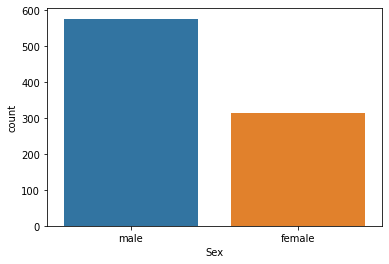

   Embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################


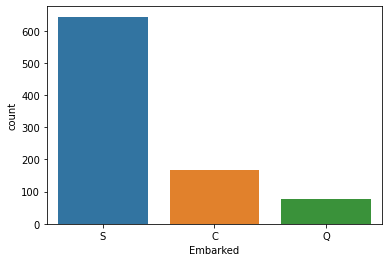

   Survived      Ratio
0       549  61.616162
1       342  38.383838
##############################


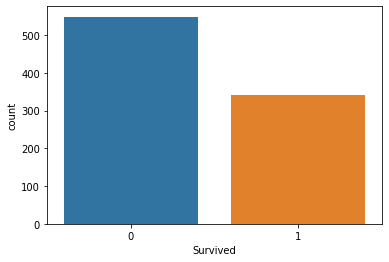

   Pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##############################


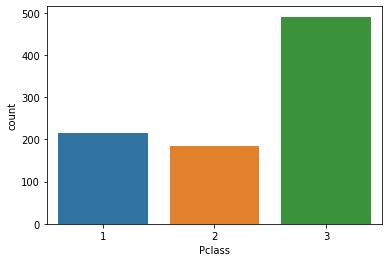

   SibSp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##############################


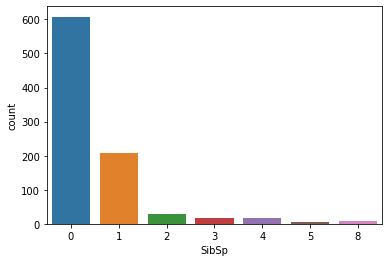

   Parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##############################


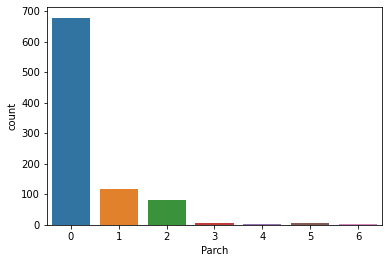

In [25]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [26]:
# analysis of numerical variables
df[["Age", "Fare"]].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
Age,714.0,29.699118,14.526497,0.42,4.000,14.00,20.1250,28.0000,38.0,41.0000,50.0000,56.00000,65.87000,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.225,7.55,7.9104,14.4542,31.0,39.6875,77.9583,112.07915,249.00622,512.3292


In [27]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in ["PassengerId"]]
num_cols = [col for col in num_cols if col not in cat_cols]

In [28]:
num_cols

['Age', 'Fare']

In [29]:
def num_summary(dataframe, numerical_col, plot=False, plot_type="hist"):
    quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        if plot_type == "hist":
            dataframe[numerical_col].hist(bins=30)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()
        
        elif plot_type == "box_plot":
            sns.boxplot(x=dataframe[numerical_col])
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()
        else:
            print("Not correct chart type")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
25%       20.125000
50%       28.000000
75%       38.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


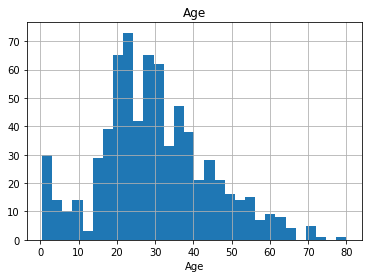

In [30]:
num_summary(df, "Age", plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
25%       20.125000
50%       28.000000
75%       38.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


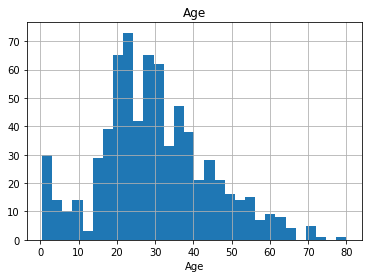

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64


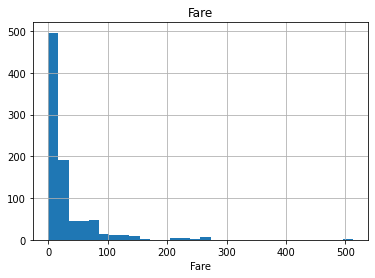

In [31]:
for col in num_cols:
    num_summary(df, col, plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
25%       20.125000
50%       28.000000
75%       38.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


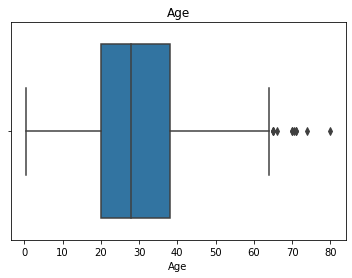

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64


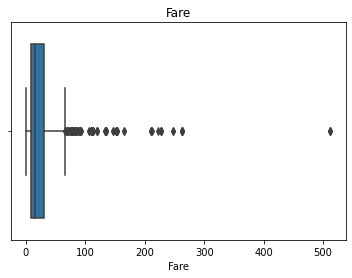

In [32]:
for col in num_cols:
    num_summary(df, col, plot=True, plot_type="box_plot")

In [33]:
def grab_col_name(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.
    
    Parameters
    ----------
    dataframe: dataframe
        The dataframe from which variable names are to be retrieved
    cat_th: int, optional
        Class threshold value for numeric but categorical variables
    car_th: int, optional
    
    Returns
    -------
        cat_cols: list
   Categorical variable list
         num_cols: list
             Numeric variable list
         cat_but_car: list
             Categorical view cardinal variable list
    
     Examples
     --------
         import seaborn as sns
         df = sns.load_dataset("iris")
         print(grab_col_names(df))
    
     Notes
     -----
         cat_cols + num_cols + cat_but_Car = total number of variables
         num_but_cat is inside cat_cols.
         The sum of the 3 returned lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
        
    """
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and 
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and 
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [34]:
grab_col_name(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


(['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 ['PassengerId', 'Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [35]:
dff = pd.read_csv("../input/nba-players-data/all_seasons.csv")

In [36]:
cat_cols, num_cols, cat_but_car = grab_col_name(dff)

Observations: 11700
Variables: 22
cat_cols: 1
num_cols: 14
cat_but_car: 7
num_but_cat: 0


           draft_round      Ratio
1                 6792  58.051282
2                 2766  23.641026
Undrafted         2094  17.897436
3                   20   0.170940
4                   12   0.102564
7                    5   0.042735
6                    5   0.042735
0                    4   0.034188
8                    2   0.017094
##############################


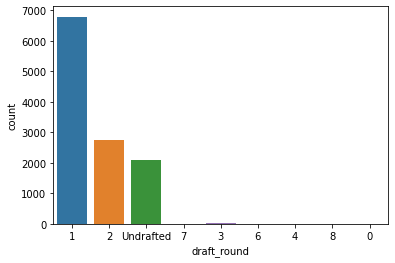

In [37]:
for col in cat_cols:
    cat_summary(dff, col, plot=True)

count    11700.000000
mean      5849.500000
std       3377.643409
min          0.000000
5%         584.950000
10%       1169.900000
25%       2924.750000
50%       5849.500000
75%       8774.250000
80%       9359.200000
90%      10529.100000
95%      11114.050000
99%      11582.010000
max      11699.000000
Name: Unnamed: 0, dtype: float64


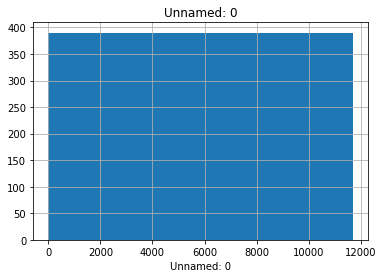

count    11700.000000
mean        27.131966
std          4.340006
min         18.000000
5%          21.000000
10%         22.000000
25%         24.000000
50%         26.000000
75%         30.000000
80%         31.000000
90%         33.000000
95%         35.000000
99%         38.000000
max         44.000000
Name: age, dtype: float64


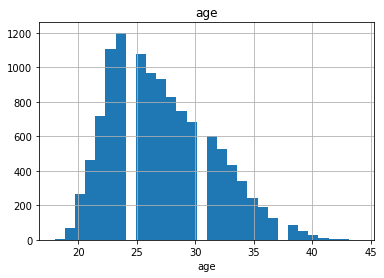

count    11700.000000
mean       200.728501
std          9.169827
min        160.020000
5%         185.420000
10%        187.960000
25%        193.040000
50%        200.660000
75%        208.280000
80%        208.280000
90%        210.820000
95%        213.360000
99%        218.440000
max        231.140000
Name: player_height, dtype: float64


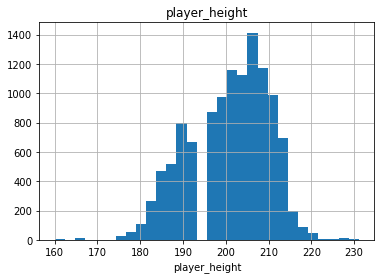

count    11700.000000
mean       100.526791
std         12.526481
min         60.327736
5%          81.646560
10%         83.914520
25%         90.718400
50%         99.790240
75%        108.862080
80%        111.130040
90%        115.665960
95%        120.201880
99%        129.273720
max        163.293120
Name: player_weight, dtype: float64


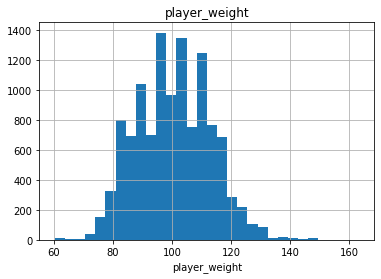

count    11700.000000
mean        51.717179
std         24.985236
min          1.000000
5%           5.000000
10%         11.000000
25%         32.000000
50%         58.000000
75%         74.000000
80%         76.000000
90%         80.000000
95%         82.000000
99%         82.000000
max         85.000000
Name: gp, dtype: float64


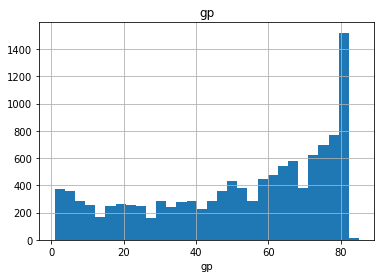

count    11700.000000
mean         8.169299
std          5.956115
min          0.000000
5%           1.200000
10%          1.900000
25%          3.600000
50%          6.700000
75%         11.500000
80%         12.800000
90%         16.900000
95%         20.100000
99%         26.400000
max         36.100000
Name: pts, dtype: float64


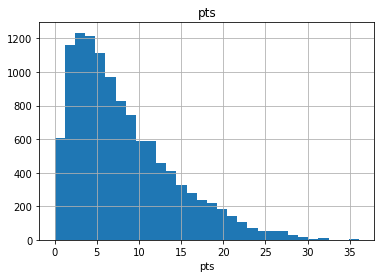

count    11700.000000
mean         3.564957
std          2.487498
min          0.000000
5%           0.700000
10%          1.000000
25%          1.800000
50%          3.000000
75%          4.700000
80%          5.300000
90%          7.000000
95%          8.700000
99%         11.600000
max         16.300000
Name: reb, dtype: float64


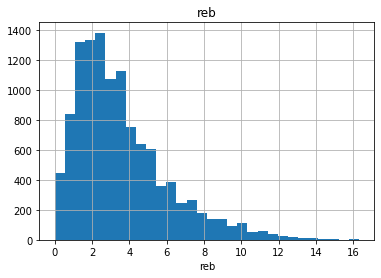

count    11700.000000
mean         1.811179
std          1.792117
min          0.000000
5%           0.100000
10%          0.300000
25%          0.600000
50%          1.200000
75%          2.400000
80%          2.800000
90%          4.200000
95%          5.600000
99%          8.400000
max         11.700000
Name: ast, dtype: float64


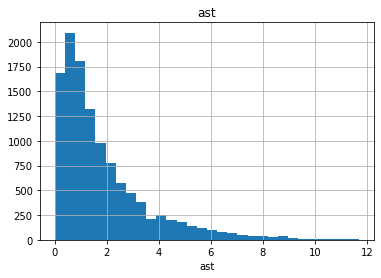

count    11700.000000
mean        -2.166410
std         12.076914
min       -200.000000
5%         -17.000000
10%        -11.800000
25%         -6.300000
50%         -1.300000
75%          3.200000
80%          4.300000
90%          7.300000
95%         10.100000
99%         20.300000
max        300.000000
Name: net_rating, dtype: float64


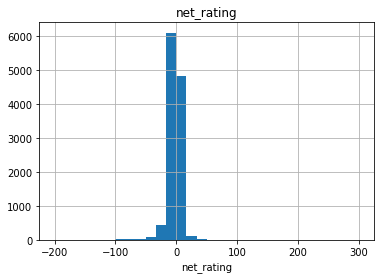

count    11700.000000
mean         0.054981
std          0.043595
min          0.000000
5%           0.008000
10%          0.013000
25%          0.021000
50%          0.042000
75%          0.084000
80%          0.093000
90%          0.114000
95%          0.130000
99%          0.164010
max          1.000000
Name: oreb_pct, dtype: float64


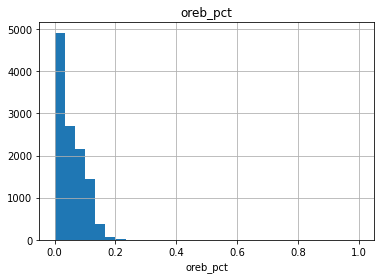

count    11700.000000
mean         0.141534
std          0.062793
min          0.000000
5%           0.063000
10%          0.075900
25%          0.096000
50%          0.132000
75%          0.180000
80%          0.193000
90%          0.222000
95%          0.250000
99%          0.308000
max          1.000000
Name: dreb_pct, dtype: float64


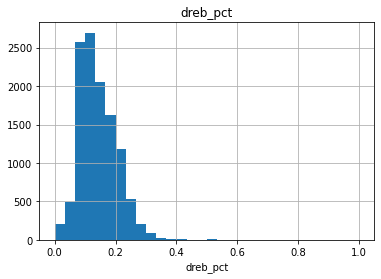

count    11700.000000
mean         0.185380
std          0.052957
min          0.000000
5%           0.108000
10%          0.124000
25%          0.150000
50%          0.182000
75%          0.218000
80%          0.227000
90%          0.252000
95%          0.276000
99%          0.323010
max          1.000000
Name: usg_pct, dtype: float64


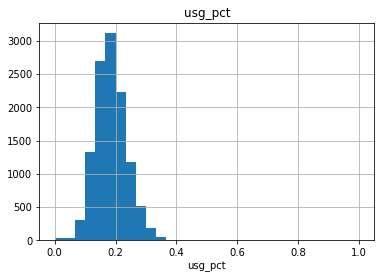

count    11700.000000
mean         0.510402
std          0.098306
min          0.000000
5%           0.360000
10%          0.417900
25%          0.479000
50%          0.523000
75%          0.559000
80%          0.569000
90%          0.595000
95%          0.619000
99%          0.696000
max          1.500000
Name: ts_pct, dtype: float64


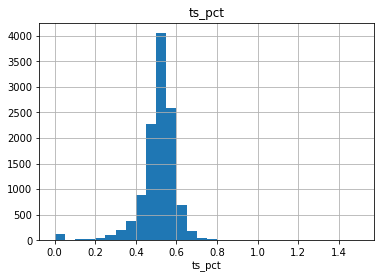

count    11700.000000
mean         0.131228
std          0.094244
min          0.000000
5%           0.024000
10%          0.040000
25%          0.065000
50%          0.103000
75%          0.178000
80%          0.205000
90%          0.271000
95%          0.320000
99%          0.417010
max          1.000000
Name: ast_pct, dtype: float64


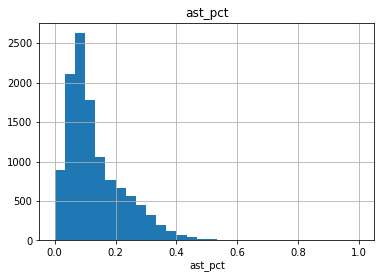

In [38]:
for col in num_cols:
    num_summary(dff, col, plot=True)

# Analysis of target variable

In [39]:
cat_cols, num_cols, cat_but_car = grab_col_name(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [40]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [41]:
for col in cat_cols:
    target_summary_with_cat(df, "Survived", col)

        TARGET_MEAN
Sex                
female     0.742038
male       0.188908


          TARGET_MEAN
Embarked             
C            0.553571
Q            0.389610
S            0.336957


          TARGET_MEAN
Survived             
0                 0.0
1                 1.0


        TARGET_MEAN
Pclass             
1          0.629630
2          0.472826
3          0.242363


       TARGET_MEAN
SibSp             
0         0.345395
1         0.535885
2         0.464286
3         0.250000
4         0.166667
5         0.000000
8         0.000000


       TARGET_MEAN
Parch             
0         0.343658
1         0.550847
2         0.500000
3         0.600000
4         0.000000
5         0.200000
6         0.000000




In [42]:
# analysis of target variable with numerical variables

In [43]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [44]:
for col in num_cols:
    target_summary_with_num(df, "Survived", col)

          PassengerId
Survived             
0          447.016393
1          444.368421


                Age
Survived           
0         30.626179
1         28.343690


               Fare
Survived           
0         22.117887
1         48.395408




In [45]:
df_bc = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

In [46]:
df_bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
df_bc = df_bc.iloc[:, 1:-1]

In [48]:
num_cols = [col for col in df_bc.columns if df_bc[col].dtype in [int, float]]

In [49]:
corr = df_bc[num_cols].corr()

In [50]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


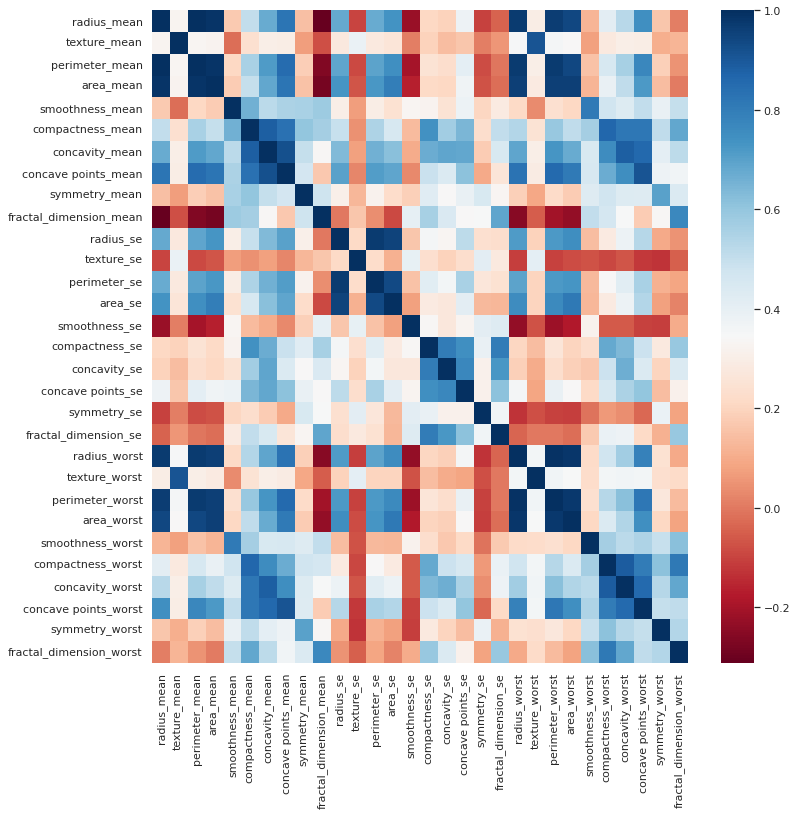

In [51]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [52]:
# deletion of highly correlated variables
pd.set_option('display.max_columns', 5)

cor_matrix = df_bc.corr().abs()

In [53]:
cor_matrix

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,...,0.163953,0.007066
texture_mean,0.323782,1.000000,...,0.105008,0.119205
perimeter_mean,0.997855,0.329533,...,0.189115,0.051019
area_mean,0.987357,0.321086,...,0.143570,0.003738
smoothness_mean,0.170581,0.023389,...,0.394309,0.499316
compactness_mean,0.506124,0.236702,...,0.510223,0.687382
concavity_mean,0.676764,0.302418,...,0.409464,0.514930
concave points_mean,0.822529,0.293464,...,0.375744,0.368661
symmetry_mean,0.147741,0.071401,...,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,...,0.334019,0.767297


In [54]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

In [55]:
upper_triangle_matrix

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,...,0.163953,0.007066
texture_mean,NaN,NaN,...,0.105008,0.119205
perimeter_mean,NaN,NaN,...,0.189115,0.051019
area_mean,NaN,NaN,...,0.143570,0.003738
smoothness_mean,NaN,NaN,...,0.394309,0.499316
compactness_mean,NaN,NaN,...,0.510223,0.687382
concavity_mean,NaN,NaN,...,0.409464,0.514930
concave points_mean,NaN,NaN,...,0.375744,0.368661
symmetry_mean,NaN,NaN,...,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,...,0.334019,0.767297


In [56]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)]

In [57]:
cor_matrix[drop_list]

,perimeter_mean,area_mean,...,area_worst,concave points_worst
radius_mean,0.997855,0.987357,...,0.941082,0.744214
texture_mean,0.329533,0.321086,...,0.343546,0.295316
perimeter_mean,1.000000,0.986507,...,0.941550,0.771241
area_mean,0.986507,1.000000,...,0.959213,0.722017
smoothness_mean,0.207278,0.177028,...,0.206718,0.503053
compactness_mean,0.556936,0.498502,...,0.509604,0.815573
concavity_mean,0.716136,0.685983,...,0.675987,0.861323
concave points_mean,0.850977,0.823269,...,0.809630,0.910155
symmetry_mean,0.183027,0.151293,...,0.177193,0.430297
fractal_dimension_mean,0.261477,0.283110,...,0.231854,0.175325


In [58]:
df_bc.drop(drop_list, axis=1)

,diagnosis,radius_mean,...,symmetry_worst,fractal_dimension_worst
0,M,17.99,...,0.4601,0.11890
1,M,20.57,...,0.2750,0.08902
2,M,19.69,...,0.3613,0.08758
3,M,11.42,...,0.6638,0.17300
4,M,20.29,...,0.2364,0.07678
...,...,...,...,...,...
564,M,21.56,...,0.2060,0.07115
565,M,20.13,...,0.2572,0.06637
566,M,16.60,...,0.2218,0.07820
567,M,20.60,...,0.4087,0.12400


In [59]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

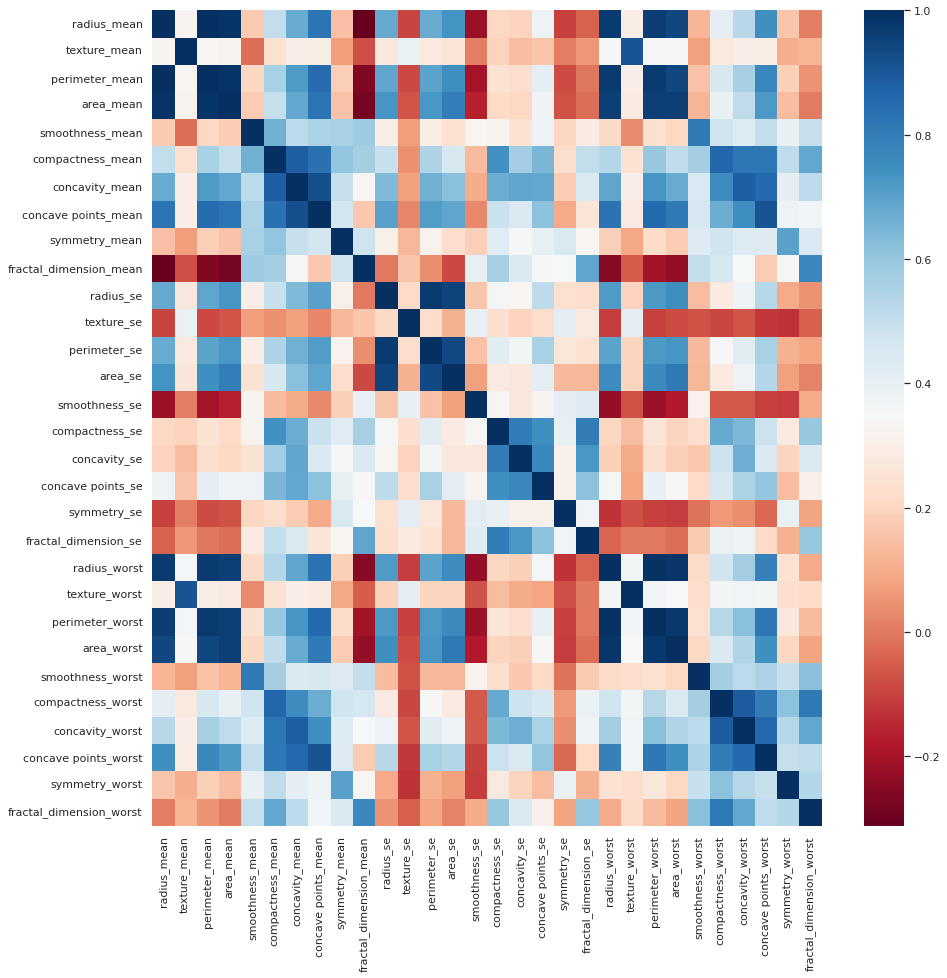

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [60]:
high_correlated_cols(df_bc, plot=True)

In [61]:
drop_list = high_correlated_cols(df_bc)

In [62]:
df_bc.drop(drop_list, axis=1)

,diagnosis,radius_mean,...,symmetry_worst,fractal_dimension_worst
0,M,17.99,...,0.4601,0.11890
1,M,20.57,...,0.2750,0.08902
2,M,19.69,...,0.3613,0.08758
3,M,11.42,...,0.6638,0.17300
4,M,20.29,...,0.2364,0.07678
...,...,...,...,...,...
564,M,21.56,...,0.2060,0.07115
565,M,20.13,...,0.2572,0.06637
566,M,16.60,...,0.2218,0.07820
567,M,20.60,...,0.4087,0.12400


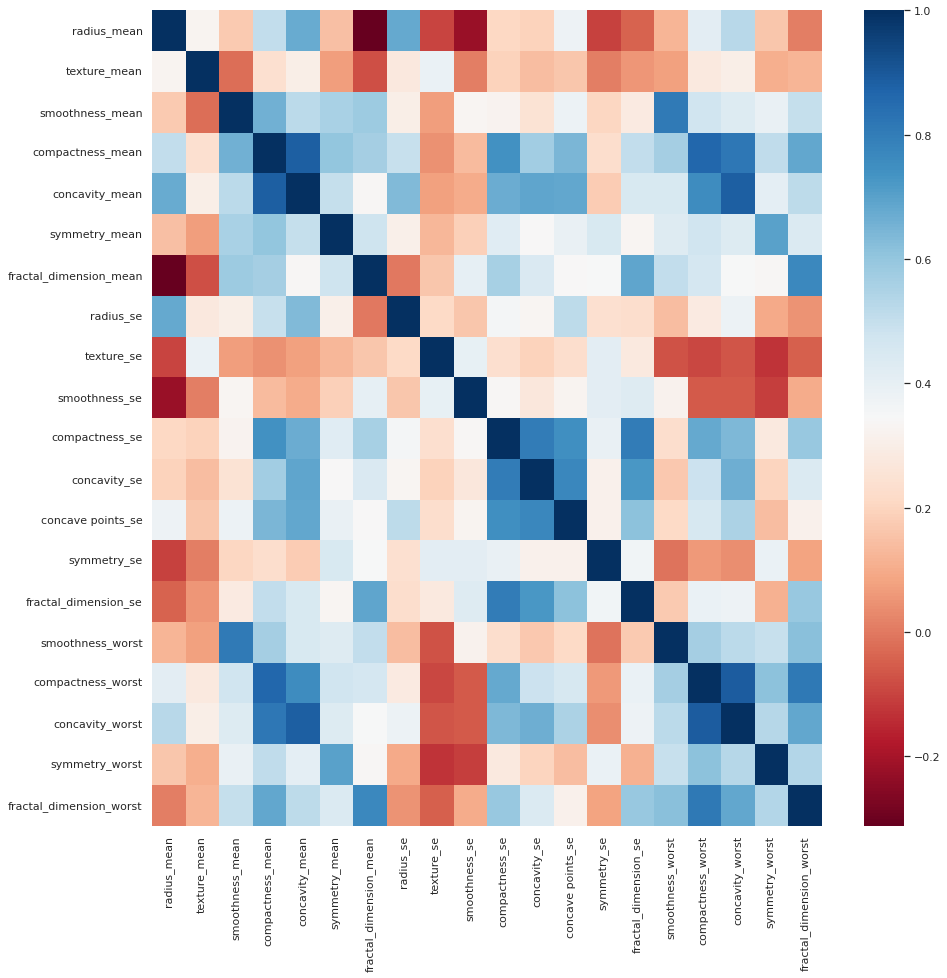

[]

In [63]:
high_correlated_cols(df_bc.drop(drop_list, axis=1), plot=True)

In [64]:
df_fraud = pd.read_csv("../input/ieee-fraud-detection/train_transaction.csv")

In [65]:
df_fraud.head()

,TransactionID,isFraud,...,V338,V339
0,2987000,0,...,NaN,NaN
1,2987001,0,...,NaN,NaN
2,2987002,0,...,NaN,NaN
3,2987003,0,...,NaN,NaN
4,2987004,0,...,0.0,0.0


In [66]:
check_df(df_fraud)

##### SHAPE #####
(590540, 394)
##### TYPES #####
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object
##### HEAD ######
   TransactionID  isFraud  ...  V338  V339
0        2987000        0  ...   NaN   NaN
1        2987001        0  ...   NaN   NaN
2        2987002        0  ...   NaN   NaN
3        2987003        0  ...   NaN   NaN
4        2987004        0  ...   0.0   0.0

[5 rows x 394 columns]
##### TAIL #####
        TransactionID  isFraud  ...  V338  V339
590535        3577535        0  ...   NaN   NaN
590536        3577536        0  ...   NaN   NaN
590537        3577537        0  ...   NaN   NaN
590538        3577538        0  ...   NaN   NaN
590539        3577539        0  ...   NaN   NaN

[5 rows x 394 columns]
##### NA

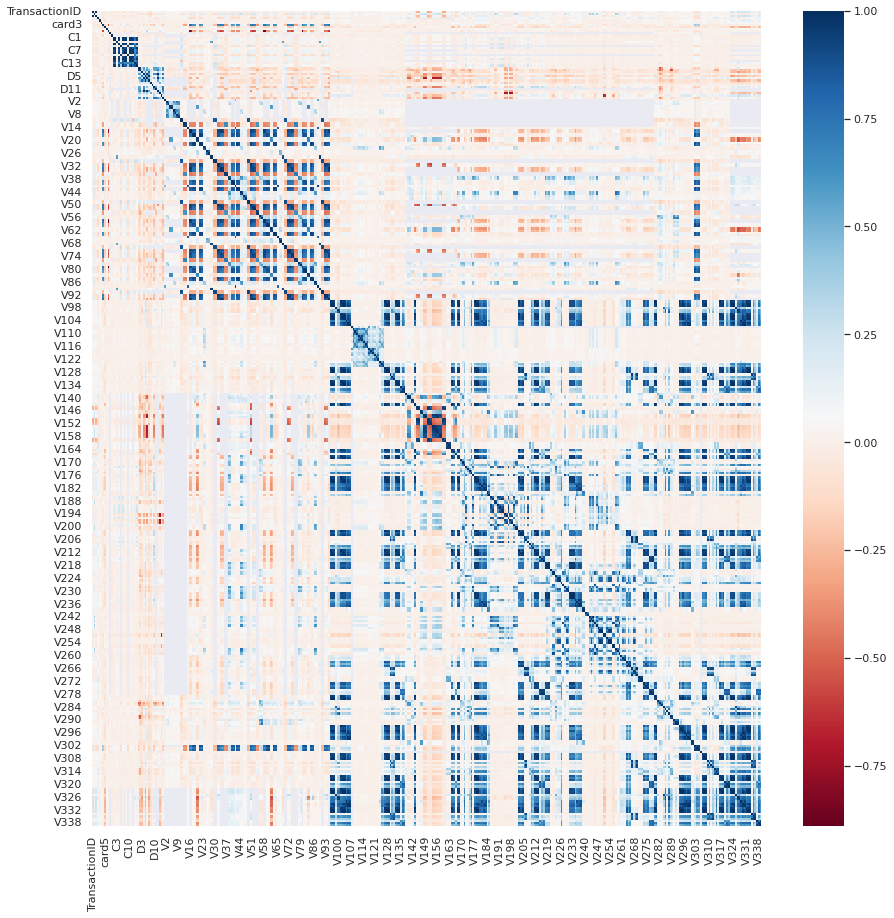

In [67]:
drop_list = high_correlated_cols(df_fraud, plot=True)

In [68]:
len(df_fraud.drop(drop_list, axis=1).columns)

198